In [9]:
from matplotlib import pyplot as plt
import pickle

def generate_plot(accuracy_scores_dict):
    """
    Generate a plot that contains the accuracy for each criterion in each iteration.
    """
    for criterion, accuracy_scores in accuracy_scores_dict.items():
        plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, label=criterion)
    plt.xticks(range(0, 22))  # x-ticks from 0 to 21
    plt.xlim(0, 22)  # x-axis limits from 0 to 21
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend(fontsize='small')
    plt.show()

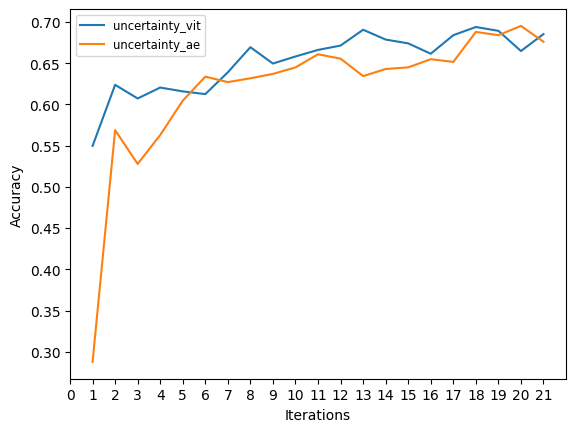

In [10]:
with open('vit_vs_ae_accuracy.pkl', 'rb') as file:
    vit_vs_ae = pickle.load(file)
generate_plot(vit_vs_ae)

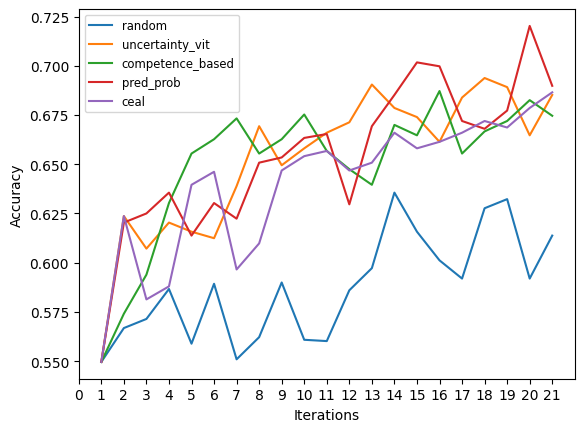

In [11]:
with open('uncertainty_approaches_accuracy.pkl', 'rb') as file:
    uncertainty_approach = pickle.load(file)
baseline_random = uncertainty_approach['random']
baseline_entropy = uncertainty_approach['uncertainty_vit']
generate_plot(uncertainty_approach)

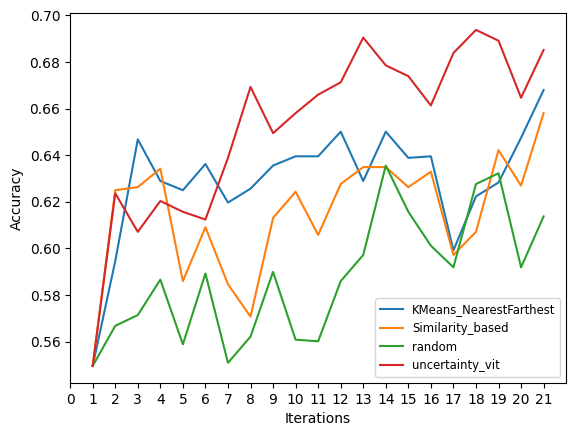

In [12]:
with open('Diversity_approach_accuracy.pkl', 'rb') as file:
    diversity_approach = pickle.load(file)
diversity_approach['random'] = baseline_random
diversity_approach['uncertainty_vit'] = baseline_entropy
generate_plot(diversity_approach)

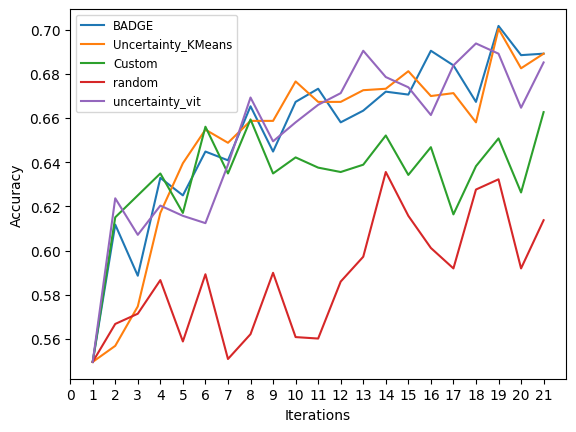

In [13]:
with open('Hybrid_approach_accuracy.pkl', 'rb') as file:
    hybrid_approach = pickle.load(file)
hybrid_approach['random'] = baseline_random
hybrid_approach['uncertainty_vit'] = baseline_entropy
generate_plot(hybrid_approach)

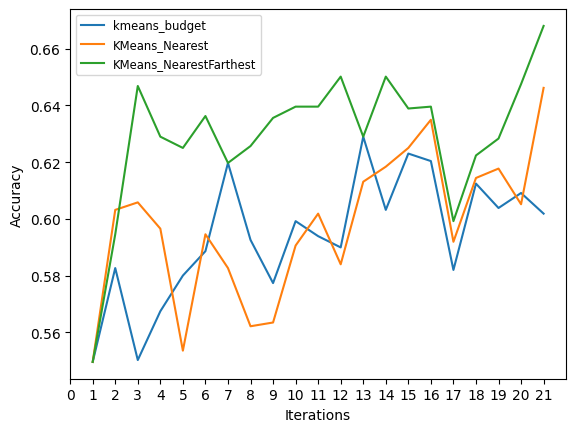

In [14]:
with open('kmeans_accuracy.pkl', 'rb') as file:
    kmeans_approach = pickle.load(file)
generate_plot(kmeans_approach)

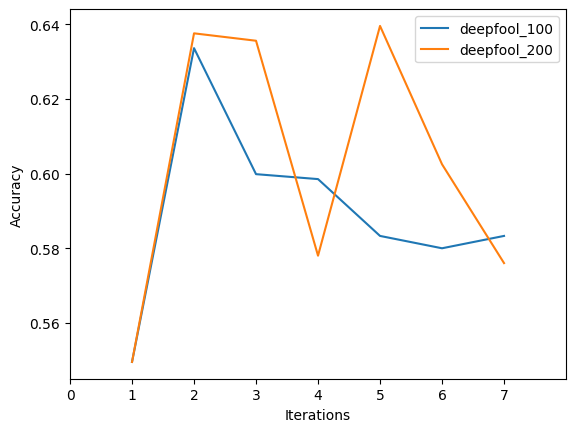

In [15]:
with open('adversial_accuracy.pkl', 'rb') as file:
    adversial_accuracy = pickle.load(file)

def generate_plot(accuracy_scores_dict):
    """
    Generate a plot that contains the accuracy for each criterion in each iteration.
    """
    for criterion, accuracy_scores in accuracy_scores_dict.items():
        plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, label=criterion)
    plt.xticks(range(0, 8))  # x-ticks from 0 to 21
    plt.xlim(0, 8)  # x-axis limits from 0 to 21
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

generate_plot(adversial_accuracy)